In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib.colors import LogNorm
import numpy as np

In [2]:
mpl.rcParams.update({'font.size': 32})

In [3]:
import pickle

In [4]:
infile = open('data/az_el_raa_hires.p', 'rb')
raa = pickle.load(infile)
infile.close()

In [5]:
infile = open('data/az_el_rll_hires.p', 'rb')
rll = pickle.load(infile)
infile.close()

In [6]:
infile = open('data/az_el_errors_hires.p', 'rb')
errors = pickle.load(infile)
infile.close()

In [7]:
infile = open('data/twosats_errors.p', 'rb')
twosats_errors = pickle.load(infile)
infile.close()

In [8]:
real_res = np.shape(raa)[::-1]

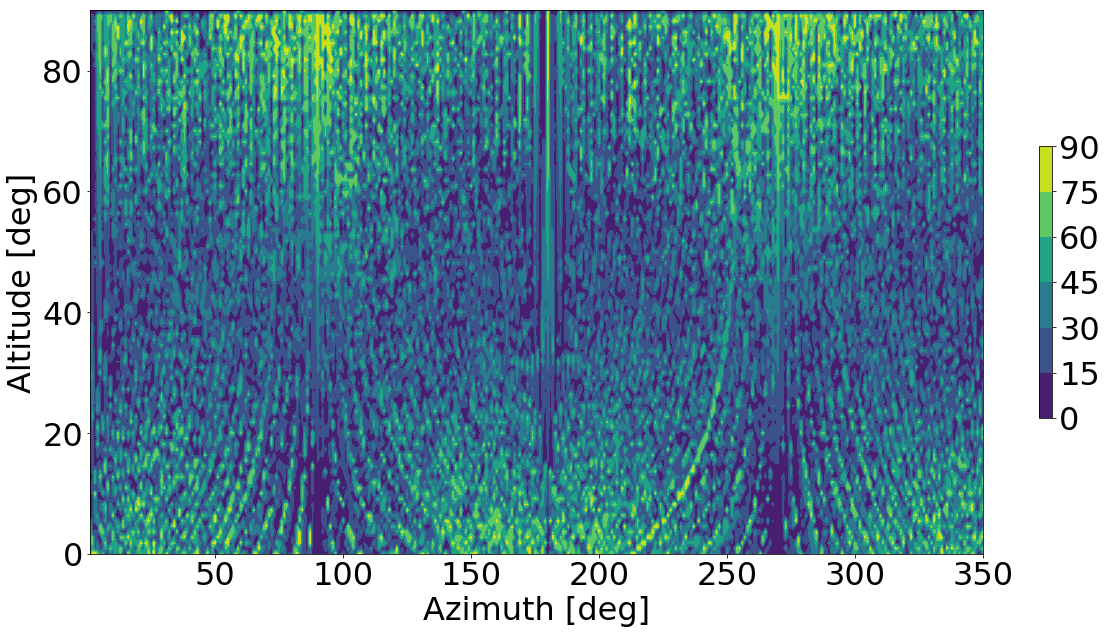

In [9]:
plt.figure(figsize=(20,10))
plt.contourf(raa,rll,np.reshape(errors,real_res[::-1]),5)
plt.xlabel('Azimuth [deg]')
plt.ylabel('Altitude [deg]')
plt.xlim((1,350))
plt.colorbar(shrink=0.5)
#plt.savefig('Plots/Sky Map with Errors Az El.pdf', transparent = True)
plt.show()

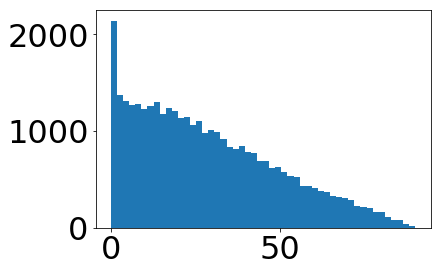

In [37]:
plt.hist(errors,bins=50,cumulative=False,normed=False)
plt.show()

In [38]:
el = np.linspace(89.,1.,num=1000.)

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


In [39]:
tot_area = 4.*np.pi
tot_solid = 0.
summed = 0.
#for angle in el:
solid_angle = [np.sin((90.-angle)*np.pi/180.) for angle in el]
avg = [np.average((np.reshape(errors,real_res[::-1]))[rll<angle]) for angle in el]

In [41]:
print(np.average(avg))
print(np.average(avg,weights=solid_angle/np.sum(solid_angle)))

28.4993084028
29.4014904181


In [42]:
weights = np.sin((90. - rll)*np.pi/180.)

In [43]:
mask = weights > 0.

In [44]:
scaled_w = weights/np.sum(weights)

In [45]:
np.average(np.reshape(errors,real_res[::-1]),weights=scaled_w)

26.93864426161548

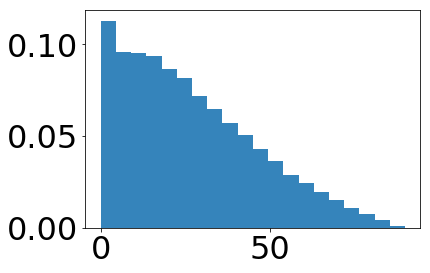

In [47]:
pw,bw,rw = plt.hist(errors, cumulative=False, weights=scaled_w.reshape(np.shape(errors)), bins=20, alpha=0.9)

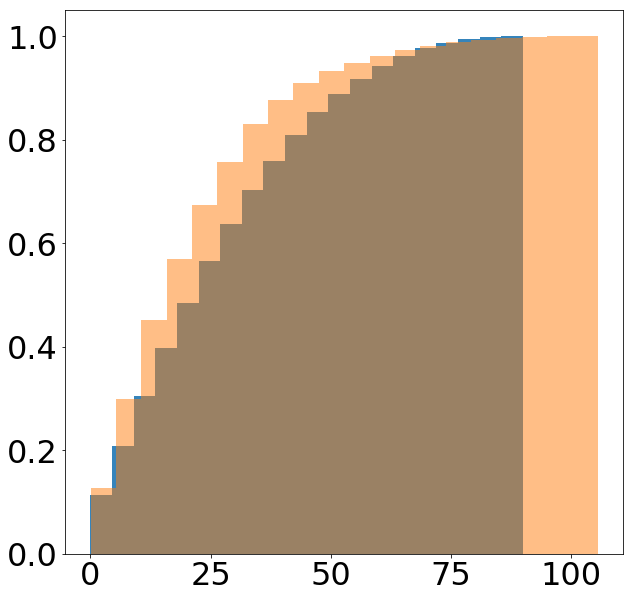

In [48]:
plt.figure(figsize=(10,10))
plt.hist(errors, cumulative=True, weights=scaled_w.reshape(np.shape(errors)), bins=20, alpha=0.9)
plt.hist(twosats_errors, cumulative=True, bins=20,normed=True, alpha=0.5)
plt.show()

In [49]:
from scipy import interpolate

In [50]:
hi_res = (360*2,90*2)
hires_x = np.linspace(0,360,hi_res[0],endpoint=False)
hires_y = np.linspace(0,90,hi_res[1])

In [51]:
f = interpolate.interp2d(raa[0], rll[:,0], np.reshape(errors,real_res[::-1]), kind='cubic')

In [52]:
znew = f(hires_x, hires_y)

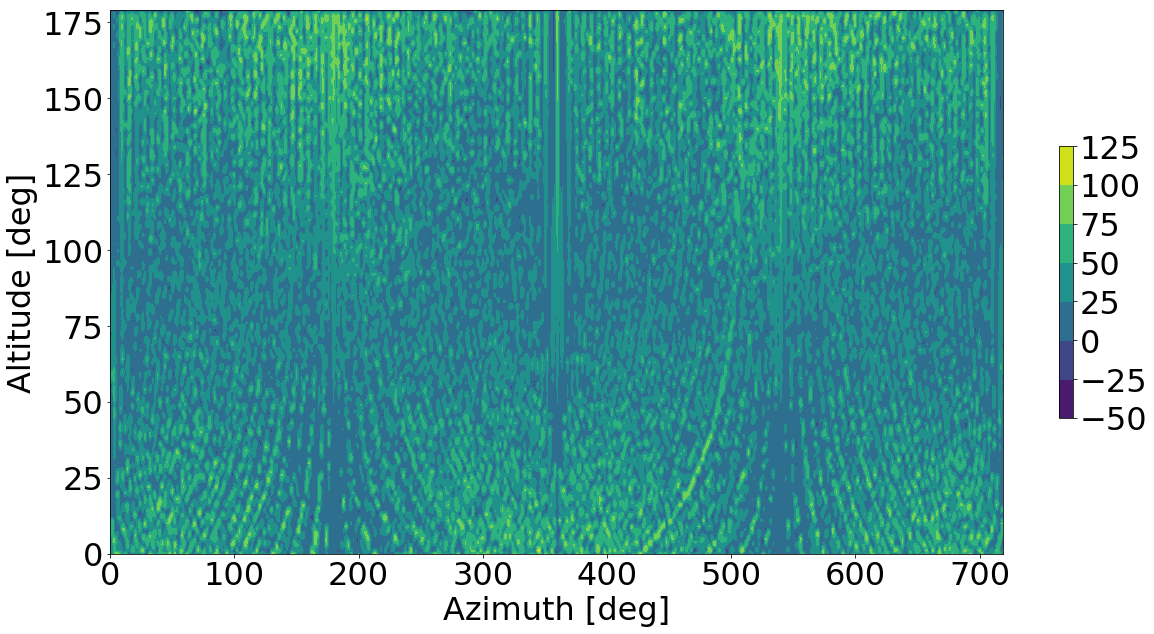

In [53]:
plt.figure(figsize=(20,10))
plt.contourf(np.reshape(znew,hi_res[::-1]),5)
plt.xlabel('Azimuth [deg]')
plt.ylabel('Altitude [deg]')
plt.colorbar(shrink=0.5)
plt.show()

In [54]:
from scipy import ndimage

In [55]:
img_gaus = ndimage.filters.gaussian_filter(np.reshape(errors,real_res[::-1]), 2, mode='nearest')

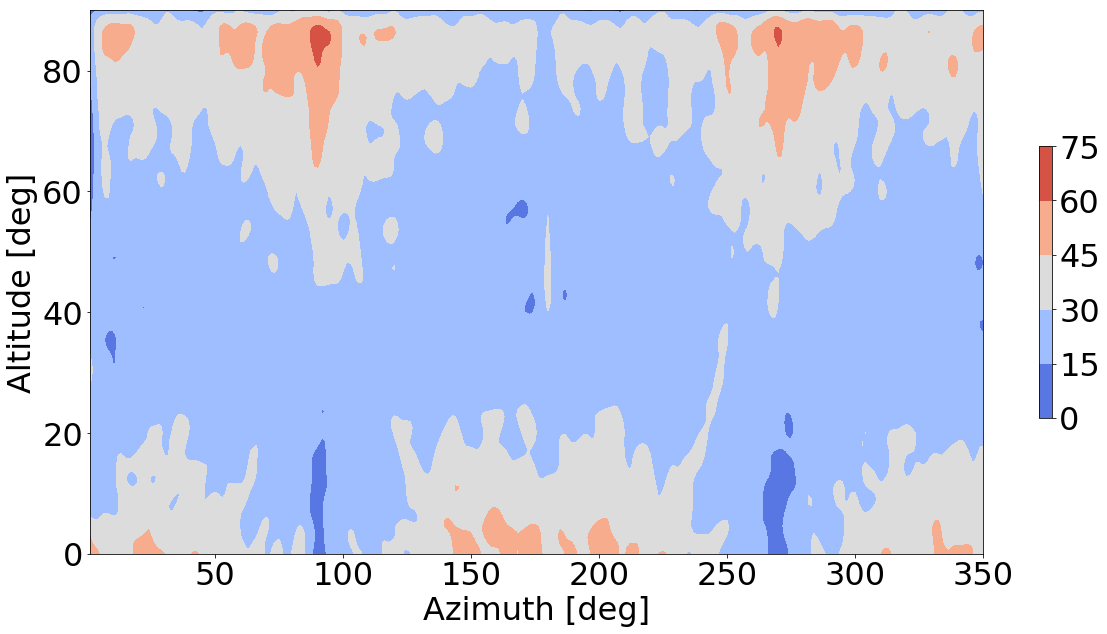

In [57]:
plt.figure(figsize=(20,10))
plt.contourf(raa,rll,img_gaus,5,cmap='coolwarm')
plt.xlabel('Azimuth [deg]')
plt.ylabel('Altitude [deg]')
plt.xlim((1,350))
plt.colorbar(shrink=0.5)
plt.savefig('Plots/Sky Map with Errors Az El.pdf', transparent = True)
plt.show()

In [58]:
def lat2str(deg):
    return ("%d Az") % (np.abs(deg))
def lon2str(deg):
    return ("%d El") % (np.abs(deg))



/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3675: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

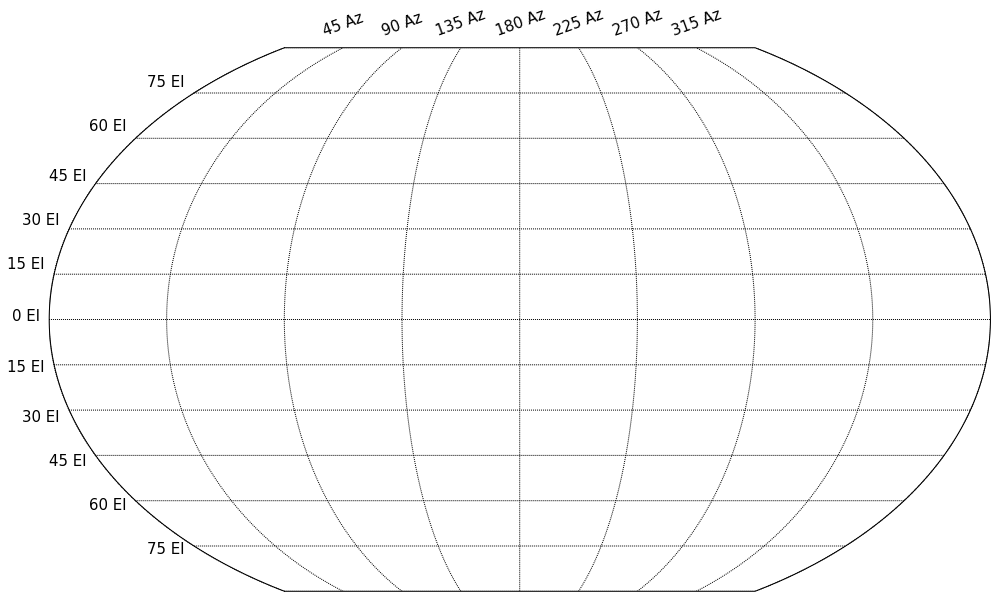

In [67]:
fig = plt.figure(figsize=(20,10))
m = Basemap(projection='kav7',lon_0=180,resolution='c')
m.drawparallels(np.arange(-90,120,15),labels=[1,0,0,0],fontsize=15,fmt=lon2str)
m.drawmeridians(np.arange(0,420,45),labels=[0,0,1,0],fontsize=15,fmt=lat2str,rotation=20)
x,y = m(raa,rll)
cax = m.contourf(x,y,img_gaus,5,cmap='coolwarm')

cbar = m.colorbar(cax,pad='6%',location='bottom')

#cbar.set_label('$W/m^2$', fontsize=18)

#plt.colorbar(shrink=0.5)  
plt.savefig('Plots/Sky Map with Errors Az El Eq. Area.pdf', transparent = True)

plt.show()

In [71]:
points,bin_edges = np.histogram(errors,bins=20,normed=True)
twosats_points,two_sats_bin_edges = np.histogram(twosats_errors,bins=20,normed=True)

In [130]:
#points[0] = points[0]/1.5
#pw[0] = pw[0]/1.5

In [72]:
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
bin_widths = bin_edges[1:] - bin_edges[:-1]
two_sats_bin_centres = (two_sats_bin_edges[:-1] + two_sats_bin_edges[1:])/2
two_sats_bin_widths = two_sats_bin_edges[1:] - two_sats_bin_edges[:-1]
bin_centres_w = (bw[:-1] + bw[1:])/2
bin_widths_w = (bw[1:] - bw[:-1])/2

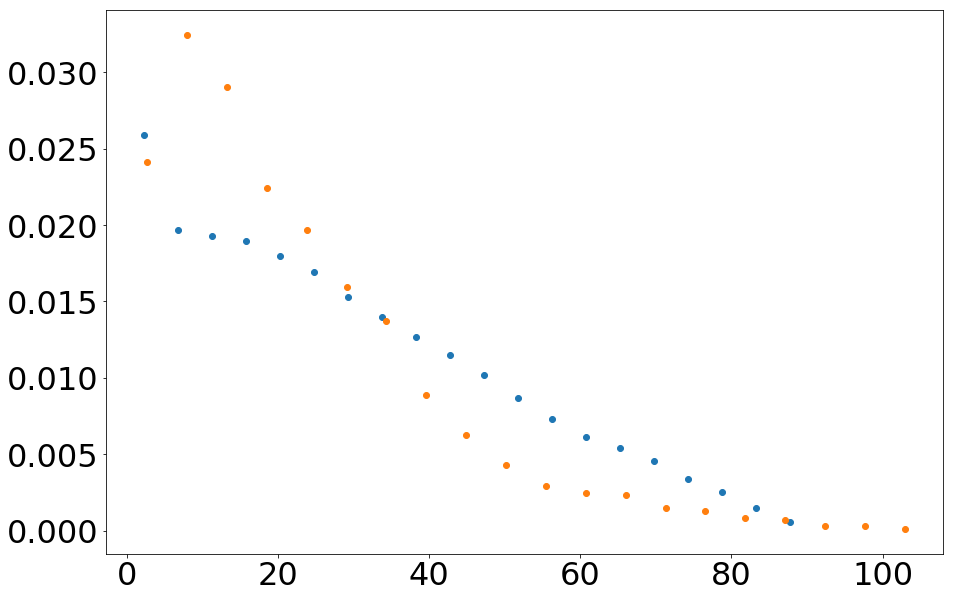

In [73]:
plt.figure(figsize=(15,10))
plt.plot(bin_centres,points,'o')
plt.plot(two_sats_bin_centres,twosats_points,'o')
plt.show()

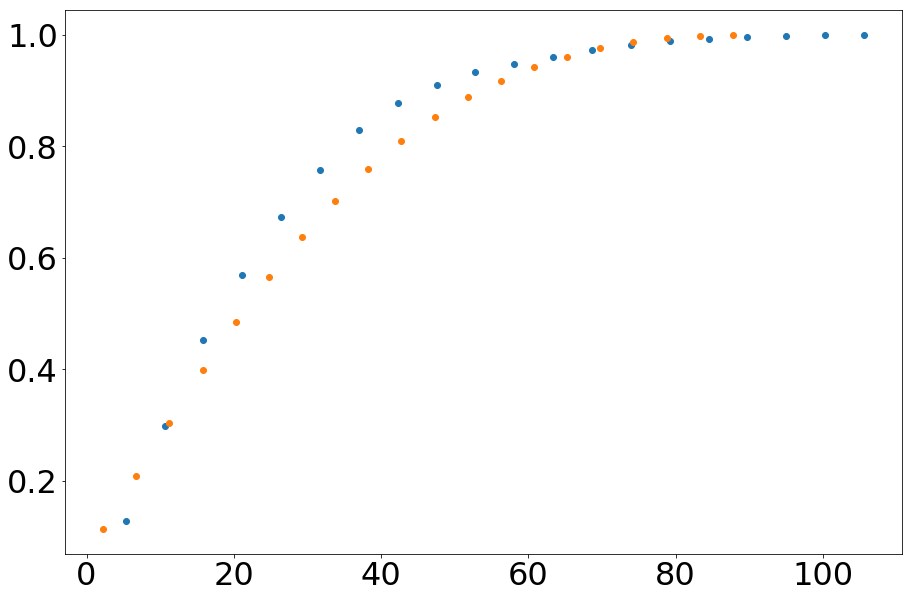

In [74]:
plt.figure(figsize=(15,10))
plt.plot(two_sats_bin_edges[1:],np.cumsum((twosats_points*two_sats_bin_widths)),'o')
plt.plot(bin_centres_w,np.cumsum(pw),'o')

#plt.xlim(0,50)
#plt.ylim(0,1)
plt.show()

In [76]:
print(np.cumsum(pw)[3],bin_centres_w[3])

0.397825077169 15.7499999787


In [77]:
pw

array([ 0.11293222,  0.09573646,  0.09555133,  0.09360507,  0.08637999,
        0.08181462,  0.07175061,  0.06465061,  0.05689544,  0.05033796,
        0.04291647,  0.03619115,  0.02877988,  0.02416063,  0.01930544,
        0.01525984,  0.01099577,  0.00743622,  0.00417352,  0.00112679])

In [78]:
e = interpolate.interp1d(np.cumsum(pw),bin_centres_w)

In [79]:
t = interpolate.interp1d(np.cumsum((twosats_points*two_sats_bin_widths)),two_sats_bin_edges[1:])

In [81]:
print(e(1/3.),t(1/3.))

12.649603303350524 11.800016959175755


In [82]:
print(e(2/3.),t(2/3.))

31.261329533641618 26.074995252093387


In [83]:
np.average(twosats_errors)

22.39213474099067

In [84]:
22.39213474099067/29.7367350305 

0.7530125522530899

Some checks on timing.  Rough numbers for now.

In [85]:
1 - (2*5)/(np.pi*22.)

0.855313688098277

In [86]:
1 - (2*10)/(np.pi*22.)

0.7106273761965539

Numbers for large errors

In [87]:
bin_centres,points
#plt.plot(two_sats_bin_centres,twosats_points,'o')

(array([  2.25      ,   6.74999999,  11.24999998,  15.74999998,
         20.24999997,  24.74999997,  29.24999996,  33.74999995,
         38.24999995,  42.74999994,  47.24999994,  51.74999993,
         56.24999992,  60.74999992,  65.24999991,  69.74999991,
         74.2499999 ,  78.74999989,  83.24999989,  87.74999988]),
 array([ 0.02588272,  0.01964815,  0.01928395,  0.01898765,  0.01796914,
         0.01691358,  0.01526543,  0.01397531,  0.01267284,  0.01150617,
         0.01016049,  0.00867901,  0.0072963 ,  0.00610494,  0.00539506,
         0.00453704,  0.00339506,  0.00251235,  0.00147531,  0.00056173]))

In [89]:
print(bin_centres[6],np.sum(points[6:]/np.sum(points)))

29.2499999605 0.465916666667


In [90]:
two_sats_bin_edges[6:],(twosats_points*two_sats_bin_widths)[5:]

(array([  31.70072756,   36.97722656,   42.25372557,   47.53022457,
          52.80672358,   58.08322258,   63.35972159,   68.63622059,
          73.9127196 ,   79.1892186 ,   84.46571761,   89.74221661,
          95.01871562,  100.29521463,  105.57171363]),
 array([ 0.08409917,  0.07234452,  0.04691173,  0.03312674,  0.02265441,
         0.01528104,  0.01303697,  0.01239581,  0.00790767,  0.00694593,
         0.00427442,  0.00374012,  0.00160291,  0.00160291,  0.0005343 ]))

In [92]:
print(two_sats_bin_centres[5],np.sum(twosats_points[5:])/np.sum(twosats_points))

29.0624780564 0.32645864501
